enter Max Thickness in percentage: 0.32
enter cl in decimals: 0.2


<ipython-input-7-309bfa3a9084>:29: RuntimeWarning: divide by zero encountered in log
  yc[i] = (cl * (1 - x[i]) * (1 - x[i]) * np.log(1 - x[i])) / (4 * np.pi)
<ipython-input-7-309bfa3a9084>:29: RuntimeWarning: invalid value encountered in scalar multiply
  yc[i] = (cl * (1 - x[i]) * (1 - x[i]) * np.log(1 - x[i])) / (4 * np.pi)
<ipython-input-7-309bfa3a9084>:30: RuntimeWarning: divide by zero encountered in log
  dyc_dx[i] = ((-cl * (1 - x[i])) / (4 * np.pi)) - ((cl * (1 - x[i]) * np.log(1 - x[i])) / (2 * np.pi))
<ipython-input-7-309bfa3a9084>:30: RuntimeWarning: invalid value encountered in scalar multiply
  dyc_dx[i] = ((-cl * (1 - x[i])) / (4 * np.pi)) - ((cl * (1 - x[i]) * np.log(1 - x[i])) / (2 * np.pi))


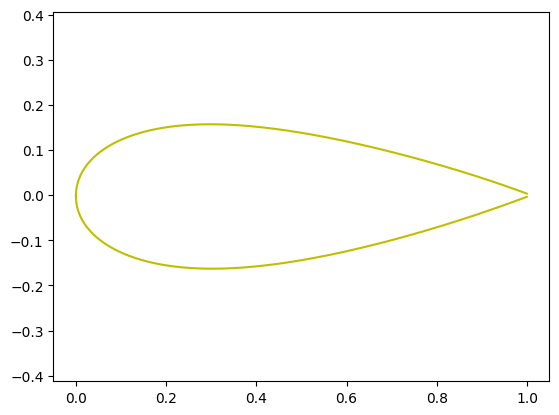

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of grid points
gridPts = 2000

# Constants
a0 = 0.2969
a1 = -0.1260
a2 = -0.3516
a3 = 0.2843
a4 = -0.1015  # Open trailing edge
# a4 = -0.1036  # Closed trailing edge

# Calculations

# m,p,t,cl are not in percentage
T = float(input('enter Max Thickness in percentage: '))
cl = float(input('enter cl in decimals: '))

# Airfoil grid
x = np.linspace(0, 1, gridPts)

# Camber and Gradient
yc = np.ones(gridPts)
dyc_dx = np.ones(gridPts)
theta = np.ones(gridPts)
for i in range(gridPts):
    yc[i] = (cl * (1 - x[i]) * (1 - x[i]) * np.log(1 - x[i])) / (4 * np.pi)
    dyc_dx[i] = ((-cl * (1 - x[i])) / (4 * np.pi)) - ((cl * (1 - x[i]) * np.log(1 - x[i])) / (2 * np.pi))
    theta[i] = np.arctan(dyc_dx[i])

# Thickness distribution
yt = 5 * T * ((a0 * np.sqrt(x)) + (a1 * x) + (a2 * x**2) + (a3 * x**3) + (a4 * x**4))

# Upper surface points
xu = x - (yt * np.sin(theta))
yu = yc + (yt * np.cos(theta))
# Lower surface points
xl = x + (yt * np.sin(theta))
yl = yc - (yt * np.cos(theta))

# Plot the airfoil (with lines)
plt.figure(3)

plt.axis('equal')
plt.plot(xu, yu, 'y-')
plt.plot(xl, yl, 'y-')
plt.show()

